## Step 1: Create the Model

In [53]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [83]:
%matplotlib inline

In [54]:
iris = pd.read_csv('../data/iris.csv')

In [55]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
X = iris.drop('species', axis=1)

In [57]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
y = iris['species']

In [59]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [60]:
from sklearn.preprocessing import LabelBinarizer

In [61]:
encoder = LabelBinarizer()

In [62]:
y = encoder.fit_transform(y)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
scaled_train = scaler.transform(X_train)

In [69]:
scaled_test = scaler.transform(X_test)

In [70]:
scaled_train

array([[0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333],
       [0.38888889, 0.33333333, 0.59322034, 0.5       ],
       [0.66666667, 0.45833333, 0.62711864, 0.58333333],
       [0.44444444, 0.41666667, 0.54237288, 0.58333333],
       [0.36111111, 0.29166667, 0.54237288, 0.5       ],
       [0.94444444, 0.41666667, 0.86440678, 0.91666667],
       [0.22222222, 0.70833333, 0.08474576, 0.125     ],
       [0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.11111111, 0.5       , 0.10169492, 0.04166667],
       [0.66666667, 0.41666667, 0.6779661 , 0.66666667],
       [0.36111111, 0.41666667, 0.59322034, 0.58333333],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.77777778, 0.41666667, 0.83050847, 0.83333333],
       [0.41666667, 0.29166667,

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(patience=10)

In [97]:
model.fit(x=scaled_train, y=y_train, epochs=300,
         validation_data=(scaled_test, y_test), callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 3ms/sample - loss: 1.0729 - accuracy: 0.3500 - val_loss: 1.0756 - val_accuracy: 0.3667
Epoch 2/300
120/120 [==============================] - 0s 98us/sample - loss: 1.0705 - accuracy: 0.3417 - val_loss: 1.0733 - val_accuracy: 0.3333
Epoch 3/300
120/120 [==============================] - 0s 126us/sample - loss: 1.0679 - accuracy: 0.3667 - val_loss: 1.0709 - val_accuracy: 0.3667
Epoch 4/300
120/120 [==============================] - 0s 141us/sample - loss: 1.0655 - accuracy: 0.3917 - val_loss: 1.0685 - val_accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 141us/sample - loss: 1.0630 - accuracy: 0.4083 - val_loss: 1.0660 - val_accuracy: 0.3667
Epoch 6/300
120/120 [==============================] - 0s 149us/sample - loss: 1.0605 - accuracy: 0.4333 - val_loss: 1.0634 - val_accuracy: 0.4000
Epoch 7/300
120/120 [==============================] - 0s 131us/sample - los

Epoch 56/300
120/120 [==============================] - 0s 189us/sample - loss: 0.8762 - accuracy: 0.6500 - val_loss: 0.9000 - val_accuracy: 0.5667
Epoch 57/300
120/120 [==============================] - 0s 168us/sample - loss: 0.8720 - accuracy: 0.6500 - val_loss: 0.8959 - val_accuracy: 0.5667
Epoch 58/300
120/120 [==============================] - 0s 148us/sample - loss: 0.8676 - accuracy: 0.6583 - val_loss: 0.8919 - val_accuracy: 0.5667
Epoch 59/300
120/120 [==============================] - 0s 148us/sample - loss: 0.8637 - accuracy: 0.6583 - val_loss: 0.8877 - val_accuracy: 0.5667
Epoch 60/300
120/120 [==============================] - 0s 156us/sample - loss: 0.8592 - accuracy: 0.6583 - val_loss: 0.8837 - val_accuracy: 0.5667
Epoch 61/300
120/120 [==============================] - 0s 147us/sample - loss: 0.8549 - accuracy: 0.6583 - val_loss: 0.8795 - val_accuracy: 0.5667
Epoch 62/300
120/120 [==============================] - 0s 150us/sample - loss: 0.8506 - accuracy: 0.6583 - val_

120/120 [==============================] - 0s 108us/sample - loss: 0.6652 - accuracy: 0.6833 - val_loss: 0.7007 - val_accuracy: 0.6000
Epoch 112/300
120/120 [==============================] - 0s 115us/sample - loss: 0.6621 - accuracy: 0.6833 - val_loss: 0.6979 - val_accuracy: 0.6000
Epoch 113/300
120/120 [==============================] - 0s 109us/sample - loss: 0.6590 - accuracy: 0.6833 - val_loss: 0.6952 - val_accuracy: 0.6000
Epoch 114/300
120/120 [==============================] - 0s 109us/sample - loss: 0.6561 - accuracy: 0.6833 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 115/300
120/120 [==============================] - 0s 115us/sample - loss: 0.6531 - accuracy: 0.6833 - val_loss: 0.6898 - val_accuracy: 0.6000
Epoch 116/300
120/120 [==============================] - 0s 112us/sample - loss: 0.6502 - accuracy: 0.6833 - val_loss: 0.6869 - val_accuracy: 0.6000
Epoch 117/300
120/120 [==============================] - 0s 116us/sample - loss: 0.6474 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 113us/sample - loss: 0.5404 - accuracy: 0.6833 - val_loss: 0.5853 - val_accuracy: 0.6000
Epoch 167/300
120/120 [==============================] - 0s 110us/sample - loss: 0.5388 - accuracy: 0.6833 - val_loss: 0.5838 - val_accuracy: 0.6000
Epoch 168/300
120/120 [==============================] - 0s 105us/sample - loss: 0.5373 - accuracy: 0.6833 - val_loss: 0.5824 - val_accuracy: 0.6000
Epoch 169/300
120/120 [==============================] - 0s 106us/sample - loss: 0.5359 - accuracy: 0.6833 - val_loss: 0.5808 - val_accuracy: 0.6000
Epoch 170/300
120/120 [==============================] - 0s 142us/sample - loss: 0.5343 - accuracy: 0.6833 - val_loss: 0.5794 - val_accuracy: 0.6000
Epoch 171/300
120/120 [==============================] - 0s 107us/sample - loss: 0.5329 - accuracy: 0.6833 - val_loss: 0.5781 - val_accuracy: 0.6000
Epoch 172/300
120/120 [==============================] - 0s 102us/sample - loss: 0.5315 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 233us/sample - loss: 0.4792 - accuracy: 0.6917 - val_loss: 0.5224 - val_accuracy: 0.6000
Epoch 222/300
120/120 [==============================] - 0s 210us/sample - loss: 0.4785 - accuracy: 0.7000 - val_loss: 0.5214 - val_accuracy: 0.6333
Epoch 223/300
120/120 [==============================] - 0s 191us/sample - loss: 0.4777 - accuracy: 0.7000 - val_loss: 0.5206 - val_accuracy: 0.6333
Epoch 224/300
120/120 [==============================] - 0s 184us/sample - loss: 0.4769 - accuracy: 0.7000 - val_loss: 0.5197 - val_accuracy: 0.6333
Epoch 225/300
120/120 [==============================] - 0s 192us/sample - loss: 0.4761 - accuracy: 0.7000 - val_loss: 0.5188 - val_accuracy: 0.6333
Epoch 226/300
120/120 [==============================] - 0s 156us/sample - loss: 0.4753 - accuracy: 0.7000 - val_loss: 0.5180 - val_accuracy: 0.6333
Epoch 227/300
120/120 [==============================] - 0s 150us/sample - loss: 0.4746 - accuracy: 0.7000 - val_loss: 0

120/120 [==============================] - 0s 148us/sample - loss: 0.4442 - accuracy: 0.7250 - val_loss: 0.4839 - val_accuracy: 0.6333
Epoch 277/300
120/120 [==============================] - 0s 160us/sample - loss: 0.4437 - accuracy: 0.7250 - val_loss: 0.4832 - val_accuracy: 0.6333
Epoch 278/300
120/120 [==============================] - 0s 128us/sample - loss: 0.4433 - accuracy: 0.7250 - val_loss: 0.4824 - val_accuracy: 0.7000
Epoch 279/300
120/120 [==============================] - 0s 146us/sample - loss: 0.4427 - accuracy: 0.7250 - val_loss: 0.4819 - val_accuracy: 0.7000
Epoch 280/300
120/120 [==============================] - 0s 110us/sample - loss: 0.4422 - accuracy: 0.7250 - val_loss: 0.4812 - val_accuracy: 0.7333
Epoch 281/300
120/120 [==============================] - 0s 116us/sample - loss: 0.4417 - accuracy: 0.7250 - val_loss: 0.4808 - val_accuracy: 0.7333
Epoch 282/300
120/120 [==============================] - 0s 112us/sample - loss: 0.4413 - accuracy: 0.7250 - val_loss: 0

In [98]:
metrics = pd.DataFrame(model.history.history)

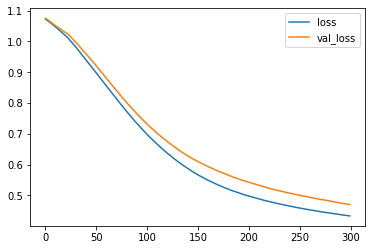

In [99]:
metrics[['loss', 'val_loss']].plot()

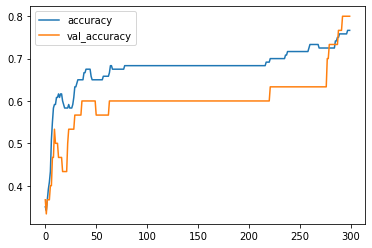

In [100]:
metrics[['accuracy', 'val_accuracy']].plot()

In [101]:
model.evaluate(scaled_test, y_test, verbose=0)

[0.4700333774089813, 0.8]

In [102]:
epochs = len(metrics)

In [103]:
epochs

300

In [104]:
scaled_X_complete = scaler.fit_transform(X)

In [105]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.fit(scaled_X_complete, y, epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 2ms/sample - loss: 0.9636 - accuracy: 0.6800
Epoch 2/300
150/150 [==============================] - 0s 58us/sample - loss: 0.9589 - accuracy: 0.6800
Epoch 3/300
150/150 [==============================] - 0s 73us/sample - loss: 0.9544 - accuracy: 0.6867
Epoch 4/300
150/150 [==============================] - 0s 68us/sample - loss: 0.9498 - accuracy: 0.6800
Epoch 5/300
150/150 [==============================] - 0s 77us/sample - loss: 0.9452 - accuracy: 0.6800
Epoch 6/300
150/150 [==============================] - 0s 97us/sample - loss: 0.9408 - accuracy: 0.6800
Epoch 7/300
150/150 [==============================] - 0s 140us/sample - loss: 0.9361 - accuracy: 0.6733
Epoch 8/300
150/150 [==============================] - 0s 88us/sample - loss: 0.9317 - accuracy: 0.6600
Epoch 9/300
150/150 [==============================] - 0s 85us/sample - loss: 0.9271 - accuracy: 0.6733
Epoch 10/300
150/150 [=====================

150/150 [==============================] - 0s 59us/sample - loss: 0.5947 - accuracy: 0.7733
Epoch 79/300
150/150 [==============================] - 0s 80us/sample - loss: 0.5916 - accuracy: 0.7733
Epoch 80/300
150/150 [==============================] - 0s 75us/sample - loss: 0.5887 - accuracy: 0.7733
Epoch 81/300
150/150 [==============================] - 0s 87us/sample - loss: 0.5855 - accuracy: 0.7733
Epoch 82/300
150/150 [==============================] - 0s 82us/sample - loss: 0.5826 - accuracy: 0.7667
Epoch 83/300
150/150 [==============================] - 0s 75us/sample - loss: 0.5796 - accuracy: 0.7667
Epoch 84/300
150/150 [==============================] - 0s 73us/sample - loss: 0.5767 - accuracy: 0.7600
Epoch 85/300
150/150 [==============================] - 0s 62us/sample - loss: 0.5740 - accuracy: 0.7600
Epoch 86/300
150/150 [==============================] - 0s 76us/sample - loss: 0.5711 - accuracy: 0.7600
Epoch 87/300
150/150 [==============================] - 0s 70us/samp

150/150 [==============================] - 0s 120us/sample - loss: 0.4457 - accuracy: 0.8800
Epoch 156/300
150/150 [==============================] - 0s 179us/sample - loss: 0.4446 - accuracy: 0.8800
Epoch 157/300
150/150 [==============================] - 0s 237us/sample - loss: 0.4431 - accuracy: 0.8800
Epoch 158/300
150/150 [==============================] - 0s 124us/sample - loss: 0.4421 - accuracy: 0.8800
Epoch 159/300
150/150 [==============================] - 0s 114us/sample - loss: 0.4406 - accuracy: 0.8800
Epoch 160/300
150/150 [==============================] - 0s 141us/sample - loss: 0.4393 - accuracy: 0.8867
Epoch 161/300
150/150 [==============================] - 0s 123us/sample - loss: 0.4381 - accuracy: 0.8933
Epoch 162/300
150/150 [==============================] - 0s 170us/sample - loss: 0.4369 - accuracy: 0.8933
Epoch 163/300
150/150 [==============================] - 0s 107us/sample - loss: 0.4355 - accuracy: 0.8933
Epoch 164/300
150/150 [============================

150/150 [==============================] - 0s 66us/sample - loss: 0.3564 - accuracy: 0.9667
Epoch 232/300
150/150 [==============================] - 0s 87us/sample - loss: 0.3554 - accuracy: 0.9667
Epoch 233/300
150/150 [==============================] - 0s 86us/sample - loss: 0.3543 - accuracy: 0.9667
Epoch 234/300
150/150 [==============================] - 0s 66us/sample - loss: 0.3531 - accuracy: 0.9667
Epoch 235/300
150/150 [==============================] - 0s 67us/sample - loss: 0.3520 - accuracy: 0.9667
Epoch 236/300
150/150 [==============================] - 0s 99us/sample - loss: 0.3509 - accuracy: 0.9667
Epoch 237/300
150/150 [==============================] - 0s 125us/sample - loss: 0.3501 - accuracy: 0.9733
Epoch 238/300
150/150 [==============================] - 0s 76us/sample - loss: 0.3487 - accuracy: 0.9733
Epoch 239/300
150/150 [==============================] - 0s 107us/sample - loss: 0.3476 - accuracy: 0.9667
Epoch 240/300
150/150 [==============================] - 0

In [107]:
import os

In [108]:
os.makedirs('../model', exist_ok=True)

In [109]:
model.save('../model/iris_classification_model.h5')

In [110]:
import joblib

In [111]:
joblib.dump(scaler, '../model/iris_classification_scaler.pkl')

['../model/iris_classification_scaler.pkl']

In [112]:
from tensorflow.keras.models import load_model

In [113]:
flower_model = load_model('../model/iris_classification_model.h5')

In [114]:
flower_scaler = joblib.load('../model/iris_classification_scaler.pkl')

In [115]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [116]:
flower_example = {
    "sepal_length": 5.1,
    "sepal_width": 3.5,
    "petal_length": 1.4,
    "petal_width": 0.2
}

In [117]:
import json

In [119]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [122]:
def return_prediction(model, scaler, sample_json):
    sepal_length = sample_json['sepal_length']
    sepal_width = sample_json['sepal_width']
    petal_length = sample_json['petal_length']
    petal_width = sample_json['petal_width']
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    flower = [[sepal_length, sepal_width, petal_length, petal_width]]
    flower = scaler.transform(flower)
    class_index = model.predict_classes(flower)
    return classes[class_index]

In [124]:
return_prediction(flower_model, flower_scaler, flower_example)

array(['setosa'], dtype='<U10')